# 08 Graphs
__Math 3080: Fundamentals of Data Science__

Reading:
* McKinney, Chapter 9 Plotting and Visualization

Outline:
1. Summary of the different plots we can use
2. Overview of MatplotLib
3. Overview of Seaborn
4. Interactive plots
    * Plotly

-----
## 8.1 Summary of different plots
There are a number of plots that we can use to display the data. Each plot is valuable in its own way. Which plot you use depends on the type of data. For example, 
* Categorical data is often displayed in groups
  * barplot/countplot
  * piechart
  * Distribution plot
  * Violin plot
* Quantitative data is often displayed by individual measurements
  * boxplot
  * scatterplot
  * timeseries graph.
  
Matplotlib began as a tool similar to the graphing tools in Matlab. However, it has grown and developed and become a powerful tool in and of itself.

Matplotlib is very hands-on, meaning that nothing is automated. Python will only plot what is told, exactly as told. Other derivations from matplotlib (such as seaborn and plotly) automate a lot of the details, simplifying the process.

You had *DataCamp* assignments on how to use MatplotLib and Seaborn. Here, we will just overview what is important from that assignment. In the Seaborn part of the lecture, we will expand and see other possibilities beyond what was discussed in the assignment.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

In [67]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 8.2 Overview of MatplotLib
Every plot has these following features:
1. A figure (a blank canvas to draw on)
2. A set of axes (a frame for adding data)
3. The graph itself
4. Customizations to the graph (color, style, graph type, legends, etc.)
5. Customizations to the axes (scales, title, etc.)

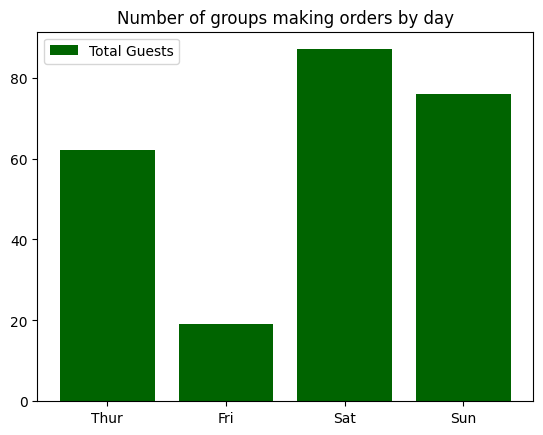

In [129]:
import matplotlib.pyplot as plt

# Wrangle the Data
tips_by_day = tips.groupby(by='day')['size'].count()

# Figure and Axes
fig, ax = plt.subplots()

# The Graph
ax.bar(tips_by_day.index,tips_by_day, label='Total Guests',
       
# Customizations to the graph
# - sometimes in their own commands,
# - sometimes included in the graph command
       color='darkgreen')

plt.legend()

# Customizations to the axes 
ax.set_title('Number of groups making orders by day')

# Show the figure
plt.show()

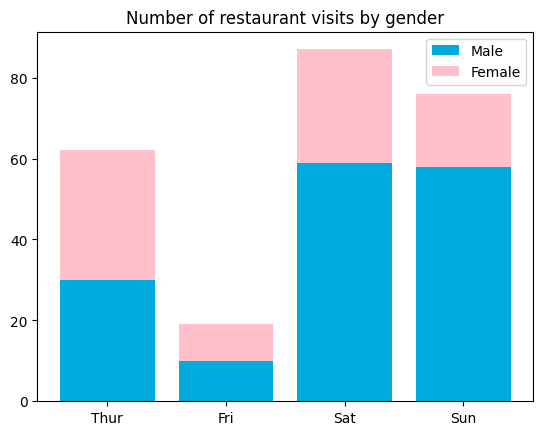

In [130]:
# Multiple Barplot

tips_by_day_gender = tips.groupby(by=['sex','day'])['size'].count()

fig, ax = plt.subplots()

ax.bar(tips_by_day_gender['Male'].index,
       tips_by_day_gender['Male'],
       label='Male',
       color="#00aadd")
ax.bar(tips_by_day_gender['Female'].index,
       tips_by_day_gender['Female'],
       bottom=tips_by_day_gender['Male'],
       label='Female',
       color="pink")

ax.set_title('Number of restaurant visits by gender')
plt.legend()

plt.show()

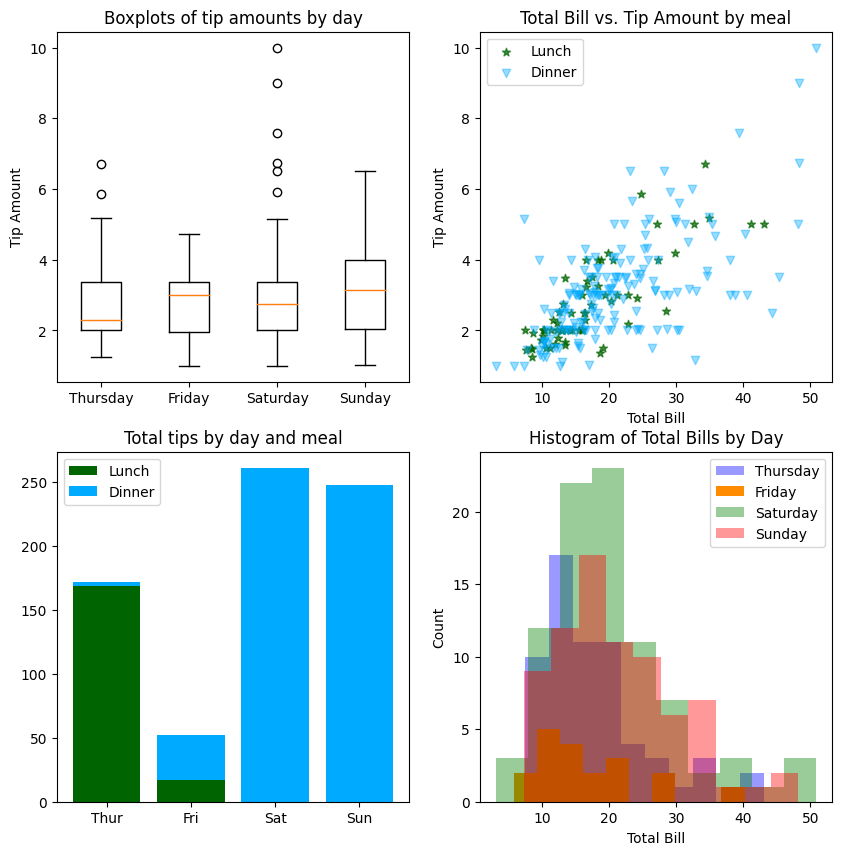

In [125]:
#####   SUBPLOTS   #####
fig, ax = plt.subplots(2,2, sharey=False, figsize=(10,10))

# Boxplot

ax[0,0].boxplot([tips[tips['day'] == "Thur"]['tip'],
                 tips[tips['day'] == "Fri"]['tip'],
                 tips[tips['day'] == "Sat"]['tip'],
                 tips[tips['day'] == "Sun"]['tip']])
ax[0,0].set_xticklabels(['Thursday','Friday','Saturday','Sunday'])
ax[0,0].set_ylabel('Tip Amount')
ax[0,0].set_title('Boxplots of tip amounts by day')

# Scatterplot

ax[0,1].scatter(tips[tips['time'] == 'Lunch']['total_bill'],
                tips[tips['time'] == 'Lunch']['tip'],
                color='darkgreen',
                alpha=0.7,
                marker='*',
                label='Lunch')
ax[0,1].scatter(tips[tips['time'] == 'Dinner']['total_bill'],
                tips[tips['time'] == 'Dinner']['tip'],
                color='#00aaff',
                alpha=0.4,
                marker='v',
                label='Dinner')

ax[0,1].set_title('Total Bill vs. Tip Amount by meal')
ax[0,1].set_xlabel('Total Bill')
ax[0,1].set_ylabel('Tip Amount')
ax[0,1].legend()

# Barplot

tips_by_day_time = tips.groupby(by=['time','day'])['tip'].sum()

ax[1,0].bar(tips_by_day_time['Lunch'].index,
       tips_by_day_time['Lunch'],
       label='Lunch',
       color="darkgreen")
ax[1,0].bar(tips_by_day_time['Dinner'].index,
       tips_by_day_time['Dinner'],
       bottom=tips_by_day_time['Lunch'],
       label='Dinner',
       color="#00aaff")

ax[1,0].set_title('Total tips by day and meal')
ax[1,0].legend()

# Histogram

ax[1,1].hist(tips[tips['day'] == 'Thur']['total_bill'],
             color='blue',
             alpha=0.40,
             label='Thursday')
ax[1,1].hist(tips[tips['day'] == 'Fri']['total_bill'],
             color='darkorange',
             #alpha=0.40,
             label='Friday')
ax[1,1].hist(tips[tips['day'] == 'Sat']['total_bill'],
             color='green',
             alpha=0.40,
             label='Saturday')
ax[1,1].hist(tips[tips['day'] == 'Sun']['total_bill'],
             color='red',
             alpha=0.40,
             label='Sunday')
ax[1,1].set_title('Histogram of Total Bills by Day')
ax[1,1].set_xlabel('Total Bill')
ax[1,1].set_ylabel('Count')
ax[1,1].legend()

# Show all plots
plt.show()

In [122]:
tips[(tips['day']=='Sun') & (tips['time']=='Lunch')]['tip'].sum()

0.0